<a href="https://colab.research.google.com/github/nxxk23/bsc_dpdm22/blob/main/midterm_dpdm22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## การเตรียมข้อมูลประกอบด้วย กำจัด outlier, แก้ missing, normalization, one-hot-encoder และ อื่นๆ ที่นักศึกษาเห็นว่าเหมาะสม

# 1 ทำนายราคาบ้าน 10 คะแนน
เตรียมข้อมูลเพื่อทำนายราคาบ้าน ราคาประเมินบ้าน และ คะแนนทรัพย์ จาก [google drive](https://drive.google.com/drive/folders/1uIcUFY1yldIq-A3wijh2n2N6az-EljIe?usp=sharing) โดยข้อมูลที่เตรียมต้องประกอบด้วย columns ต่อไปนี้

* ```'renovate','number_of_rai','number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','direction','furniture','usable_area','number_of_parking', 'sell_price'``` จากตาราง "Data House"

* ```จำนวน 7-11 และ โรงเรียน ในรัศมี 200,500,1000,2000 เมตร (ตั้งชื่อ d200-7/11','d500-7/11',...,'d2000-7/11' แบะ ;d200-school','d500-school',...,'d2000-school')``` จากตาราง "7-eleven.json" และ "school.json"

* ```ประเมินราคาซื้อขาย และ คะแนนทรัพย์ (ตั้งชื่อ 'estimator' และ 'score')``` จากตาราง คำตอบนักประเมิน(ID) โดยราคาประเมินกับคะแนนทรัพย์ อ้างอิงของนักประเมิน ID=01 คนเดียว

In [357]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##ตารางบ้าน

In [358]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [359]:
import pandas as pd

In [360]:
gsht = gc.open_by_key('1QO6OiGqyr8i78MVnjyLBBtr5Y8AoBM1tHZRg0Ud5CW4')
worksheet = gsht.worksheet("บ้านมือ1")
rows = worksheet.get_all_values()
home1 = pd.DataFrame.from_records(rows)
home1.columns=home1.iloc[0] 
home1 = home1.iloc[1:,]

In [361]:
for i in home1.columns:
    print(i)

id
parent_id
project_name
province
district
sub_district
zip_code
zone_id
zone
property_type
company
company_id
order
user_id
street
name_th
name_en
description
latitude
longitude
number_of_rai
number_of_ngan
number_of_va
construct_year
model
sell_price
rent_price
expire_date
expired
close_reason
usable_area
number_of_unit
number_of_story
number_of_bedroom
number_of_bathroom
central_cost
direction
furniture
rent_status
accept_agent
number_of_parking
area
building_number
number_of_building
floor_number
parking_percentage
number_of_lift
line_group_id
line_group_name
line_group_image
minimum_contract_month
has_lift
can_pet
can_smoke
has_ac
has_wardrobe
has_single_bed
has_double_bed
has_makeup_desk
has_desk
has_sofa
has_sink
has_tv
has_refrig
has_heater
has_cable_tv
has_wifi
has_lan
has_other
water_as_use
water_as_use_unit_price
water_as_use_minimum
water_as_normal
water_per_person
water_per_person_price
water_per_person_maximum
water_per_person_over_price
water_per_room
water_per_room_pri

In [362]:
home1

,id,parent_id,project_name,province,district,sub_district,zip_code,zone_id,zone,property_type,...,cable_free,cable_none,cable_ask,position_previous,position_current,sold_out_at,is_pro_in_house,created_at,updated_at,deleted_at
1,314,41,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,,5,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านเดี่ยว,...,,,,0,0,,0,44012,44602,
2,315,41,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,,5,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านแฝด,...,,,,0,0,,0,44012,44602,
3,316,41,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,,5,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านเดี่ยว,...,,,,0,0,,0,44012,44602,
4,317,41,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,,5,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านเดี่ยว,...,,,,0,0,,0,44012,44602,
5,318,41,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,,5,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านเดี่ยว,...,,,,0,0,,0,44012,44602,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,62204519412ede001495e6cb,622045edc1620300140bc3de,บ้านชีวิตดี (หนองหิน-ศิลา),ขอนแก่น,เมืองขอนแก่น,ศิลา,,,,บ้านเดี่ยว,...,,,,,,,,,,
751,62201e6fa441d30014e1f350,62201f07a441d30014e1f352,เดอะ คาล์ม วิลเลจ,ขอนแก่น,เมืองขอนแก่น,พระลับ,,,,บ้านเดี่ยว,...,,,,,,,,,,
752,5fa0e476a3326800191e29ea,5fa10335d0235b0019c19548,เดอะ เล็ก วิวล์ @พล,ขอนแก่น,พล,โจดหนองแก,,,,บ้านเดี่ยว,...,,,,,,,,,,
753,5e9d6fa69f161600121b61b2,5e9d70379f161600121b61b7,เดอะ เล็ก วิวล์ @แวงน้อย,ขอนแก่น,แวงน้อย,แวงน้อย,,,,บ้านเดี่ยว,...,,,,,,,,,,


In [363]:
gsht = gc.open_by_key('1QO6OiGqyr8i78MVnjyLBBtr5Y8AoBM1tHZRg0Ud5CW4')
worksheet = gsht.worksheet("บ้านมือ2")
rows = worksheet.get_all_values()
home2 = pd.DataFrame.from_records(rows)
home2.columns=home2.iloc[0] 
home2 = home2.iloc[1:,]

In [364]:
home2

,id,name_th,name_en,project_name,company,province,district,sub_district,property_type,home improvement,...,furniture,building_number,number_of_building,floor_number,parking_percentage,has_pool,has_keycard,has_security,has_fitness,has_garden
1,1,บ้านเดี่ยว ชนบท ขอนแก่น,บ้านเดี่ยว ชนบท ขอนแก่น,บ้านวังเวิน,,ขอนแก่น,ชนบท,ศรีบุญเรือง,บ้านเดี่ยว,no,...,ไม่มี,,,,,,,,,
2,4,บ้านเดี่ยว น้ำพอง ขอนแก่น,บ้านเดี่ยว น้ำพอง ขอนแก่น,บ้านหนองบัวบาน,,ขอนแก่น,น้ำพอง,ทรายมูล,บ้านเดี่ยว,no,...,ไม่มี,,,,,,,,,
3,16,บ้านเดี่ยว มัญจาคีรี ขอนแก่น,บ้านเดี่ยว มัญจาคีรี ขอนแก่น,,,ขอนแก่น,มัญจาคีรี,กุดเค้า,บ้านเดี่ยว,no,...,ไม่ระบุ,,,,,,,,,
4,18,บ้านเดี่ยว เมืองขอนแก่น หมู่บ้านชลลดา,บ้านเดี่ยว เมืองขอนแก่น หมู่บ้านชลลดา,ชลลดา ขอนแก่น,บริษัท แลนด์แอนด์เฮ้าส์ จำกัด (มหาชน),ขอนแก่น,เมืองขอนแก่น,บ้านเป็ด,บ้านเดี่ยว,no,...,ไม่ระบุ,,,,,,,,,
5,19,บ้านเดี่ยว เมืองขอนแก่น หมู่บ้านเบสต์โฮม,บ้านเดี่ยว เมืองขอนแก่น หมู่บ้านเบสต์โฮม,เบสท์โฮม,เบสท์โฮม เลี่ยงเมืองขอนแก่น,ขอนแก่น,เมืองขอนแก่น,บ้านเป็ด,บ้านเดี่ยว,no,...,ไม่ระบุ,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1652,20460P,ขายถูก! บ้านเดี่ยว จังหวัดขอนแก่น 02-88-06026,ขายถูก! บ้านเดี่ยว จังหวัดขอนแก่น 02-88-06027,,,ขอนแก่น,บ้านฝาง,หนองบัว,บ้านเดี่ยว,no,...,ไม่ระบุ,,,,,,,,,
1653,20462P,ขายถูก! บ้านเดี่ยว จังหวัดขอนแก่น 02-88-06033,ขายถูก! บ้านเดี่ยว จังหวัดขอนแก่น 02-88-06034,,,ขอนแก่น,หนองเรือ,โนนทอง,บ้านเดี่ยว,no,...,ไม่ระบุ,,,,,,,,,
1654,20463P,ขายถูก! บ้านเดี่ยว จังหวัดขอนแก่น 02-88-07581,ขายถูก! บ้านเดี่ยว จังหวัดขอนแก่น 02-88-07582,,,ขอนแก่น,แวงน้อย,ก้านเหลือง,บ้านเดี่ยว,no,...,ไม่ระบุ,,,,,,,,,
1655,20466P,ขายถูก! บ้านเดี่ยว จังหวัดขอนแก่น 02-88-10402,ขายถูก! บ้านเดี่ยว จังหวัดขอนแก่น 02-88-10403,,,ขอนแก่น,ชุมแพ,วังหินลาด,บ้านเดี่ยว,no,...,ไม่ระบุ,,,,,,,,,


### insert column second_hand

In [365]:
home1['second_hand']='บ้านมือ1'

In [366]:
home2['second_hand']='บ้านมือ2'

###รวมตารางบ้าน

In [367]:
h2 = home2[['id','renovate','number_of_rai','number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','direction','furniture','usable_area','number_of_parking', 'sell_price','second_hand']]

In [368]:
h1 = home1[['id','number_of_rai','number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','direction','furniture','usable_area','number_of_parking', 'sell_price','second_hand']]

In [369]:
house = pd.concat([h1,h2])

In [370]:
house

,id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price,second_hand,renovate
1,314,,,50,2,4,3,0,0,185,2,3950000,บ้านมือ1,NaN
2,315,,,40,2,4,3,0,0,165,2,3250000,บ้านมือ1,NaN
3,316,,,77.25,2,4,3,0,0,260,2,6300000,บ้านมือ1,NaN
4,317,,,81.25,2,6,5,0,0,343,3,6900000,บ้านมือ1,NaN
5,318,,,55,2,4,4,0,0,223,2,4490000,บ้านมือ1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1652,20460P,0,0,73,1,2,1,ไม่ระบุ,ไม่ระบุ,108.76,,437400,บ้านมือ2,no
1653,20462P,0,0,84,1,2,1,ไม่ระบุ,ไม่ระบุ,119,,714600,บ้านมือ2,no
1654,20463P,0,1,45,2,1,1,ไม่ระบุ,ไม่ระบุ,188.5,,451000,บ้านมือ2,no
1655,20466P,0,1,59,2,1,1,ไม่ระบุ,ไม่ระบุ,207,,910000,บ้านมือ2,no


## Handling Missing
- renovate fillna with ไม่ระบุ
- number_of_rai, number_of_ngan, number_of_va, number_of_story, number_of_bedroom, number_of_bathroom replace space with -

In [371]:
house.isnull().any()

0
id                    False
number_of_rai         False
number_of_ngan        False
number_of_va          False
number_of_story       False
number_of_bedroom     False
number_of_bathroom    False
direction             False
furniture             False
usable_area           False
number_of_parking     False
sell_price            False
second_hand           False
renovate               True
dtype: bool

In [372]:
a = pd.isnull(house["renovate"])

In [373]:
house = house.fillna('ไม่ระบุ')

In [374]:
house_complete = house.replace('','-', regex=True)

###House_complete


In [375]:
house_complete.head()

,id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price,second_hand,renovate
1,314,-,-,50,2,4,3,0,0,185,2,3950000,บ้านมือ1,ไม่ระบุ
2,315,-,-,40,2,4,3,0,0,165,2,3250000,บ้านมือ1,ไม่ระบุ
3,316,-,-,77.25,2,4,3,0,0,260,2,6300000,บ้านมือ1,ไม่ระบุ
4,317,-,-,81.25,2,6,5,0,0,343,3,6900000,บ้านมือ1,ไม่ระบุ
5,318,-,-,55,2,4,4,0,0,223,2,4490000,บ้านมือ1,ไม่ระบุ


##ตารางคำตอบนักประเมิน

In [376]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [377]:
import pandas as pd

In [378]:
gsht = gc.open_by_key('1A3A-Yl4Tmcq2kPWf37QG6xdRZZ-4XDWULRPfORGPrNQ')
worksheet = gsht.worksheet("บ้าน")
rows = worksheet.get_all_values()
ass = pd.DataFrame.from_records(rows)
ass.columns=ass.iloc[0] 
ass = ass.iloc[1:,]
ass.head()

,ID ผู้ประเมิน,post id,ID,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์
1,1,https://nayoo.co/khonkaen/posts/25,25,บ้านเดี่ยว,มั่นใจ,"2,890,000","2,500,000","5,000-15,000",,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
2,2,https://nayoo.co/khonkaen/posts/25,25,บ้านเดี่ยว,มั่นใจ,"2,890,000","2,700,000","โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
3,1,https://nayoo.co/khonkaen/posts/33,33,บ้านเดี่ยว,มั่นใจ,"2,600,000","2,200,000","5,000-15,000",,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,2,https://nayoo.co/khonkaen/posts/33,33,บ้านเดี่ยว,มั่นใจ,"2,600,000","2,400,000","ราคาเสนอขายประมาณ 2,200,000 - 2,500,000 บาท/หลัง",,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
5,1,https://nayoo.co/khonkaen/posts/495,495,บ้านเดี่ยว,มั่นใจ,"6,050,000","5,000,000","5,000-15,000",,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [379]:
ass1 = ass[ass['ID ผู้ประเมิน']=='1']
ass1.count()

0
ID ผู้ประเมิน                     1217
post id                           1217
ID                                1217
property_type                     1217
ความมั่นใจในการเมินราคาทรัพย์     1217
ราคาทรัพย์                        1217
ประเมินราคาซื้อ-ขาย               1217
ปัจจัยในการประเมินราคาซื้อ-ขาย    1217
เหตุผลไม่มั่นใจราคาประเมิน        1217
ให้คะแนนทรัพย์                    1217
dtype: int64

In [380]:
ass1 = ass1[['ประเมินราคาซื้อ-ขาย', 'ให้คะแนนทรัพย์']]

###ตารางคำตอบนักประเมินคนที่ 1

In [381]:
ass1.rename(columns={'ประเมินราคาซื้อ-ขาย':'estimator', 'ให้คะแนนทรัพย์':'score'})

,estimator,score
1,"2,500,000",3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
3,"2,200,000",2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
5,"5,000,000",3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
7,"3,500,000",2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
9,"2,500,000",3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...
1863,"4,500,000",2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1864,"3,500,000",2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1865,"1,800,000",2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1866,"5,500,000",2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


In [382]:
ass1.isnull().any()

0
ประเมินราคาซื้อ-ขาย    False
ให้คะแนนทรัพย์         False
dtype: bool

##ตาราง 7/11

In [383]:
import pandas as pd
import json
with open('/content/drive/MyDrive/DPDM/Midterm/MIDterm/7-eleven.json') as json_file:
    sv = json.loads(json_file.read())

## ตาราง school

In [384]:
with open('/content/drive/MyDrive/DPDM/Midterm/MIDterm/school.json') as json_file:
    sc = json.loads(json_file.read())

In [385]:
seven_id = {}
for t in sv:
    l = list()
    for x in sv[t]:
        l.append(x['geometry']['location'])
    #print(t)
    #print(l)
    seven_id[t]=l

In [386]:
school_id = {}
for t in sc:
    l = list()
    for x in sc[t]:
        l.append(x['geometry']['location'])
    #print(t)
    #print(l)
    school_id[t]=l

##ตาราง บ้าน

In [387]:
thishome = pd.concat([home1,home2])
thishome

,id,parent_id,project_name,province,district,sub_district,zip_code,zone_id,zone,property_type,...,land wide(m),land long(m),topsoil,corner,alley,has_pool,has_keycard,has_security,has_fitness,has_garden
1,314,41,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,,5,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านเดี่ยว,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,315,41,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,,5,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านแฝด,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,316,41,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,,5,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านเดี่ยว,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,317,41,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,,5,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านเดี่ยว,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,318,41,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,,5,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านเดี่ยว,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1652,20460P,NaN,,ขอนแก่น,บ้านฝาง,หนองบัว,,NaN,,บ้านเดี่ยว,...,,,,,,,,,,
1653,20462P,NaN,,ขอนแก่น,หนองเรือ,โนนทอง,,NaN,,บ้านเดี่ยว,...,,,,,,,,,,
1654,20463P,NaN,,ขอนแก่น,แวงน้อย,ก้านเหลือง,,NaN,,บ้านเดี่ยว,...,,,,,,,,,,
1655,20466P,NaN,,ขอนแก่น,ชุมแพ,วังหินลาด,,NaN,,บ้านเดี่ยว,...,,,,,,,,,,


In [388]:
thishome = thishome[['id','latitude','longitude']]
thishome

,id,latitude,longitude
1,314,16.392304,102.827926
2,315,16.392304,102.827926
3,316,16.392304,102.827926
4,317,16.392304,102.827926
5,318,16.392304,102.827926
...,...,...,...
1652,20460P,16.48011,102.574033
1653,20462P,16.528551,102.411762
1654,20463P,15.867444,102.482085
1655,20466P,16.636912,102.105343


In [392]:
id = '16'

In [393]:
this_home = thishome[thishome['id']==id]
this_home

,id,latitude,longitude
3,16,16.129358,102.53067


In [394]:
h_lat = this_home['latitude'].values
h_lng = this_home['longitude'].values

In [395]:
this_seven = seven_id[str(id)]
this_seven

[{'lat': 16.1340329, 'lng': 102.5331697},
 {'lat': 16.1294298, 'lng': 102.540669}]

คำนวณระยะทางระหว่าง 7-11 กับ บ้าน

In [396]:
import geopy.distance

In [397]:
seven_dist=list()
loc1 = [h_lat,h_lng]
for seven in this_seven:
    loc2 = [seven['lat'],seven['lng']]
    dist = geopy.distance.geodesic(loc1,loc2).m
    seven_dist.append(dist)

seven_dist

[582.3364506890924, 1069.5748505191752]

In [398]:
def cal_seven_radius(seven_dist_list,radius):
    num = 0
    for seven in seven_dist_list:
        if seven < radius:
            num = num + 1
    return num

In [399]:
import numpy as np

In [400]:
record_list = list()

In [401]:
record_dict = {}
record_dict['id'] = id 
record_dict['d200-7/11'] = sum(np.array(seven_dist) < 200)
record_dict['d500-7/11'] = sum(np.array(seven_dist) < 500)
record_dict['d1000-7/11'] = sum(np.array(seven_dist) < 1000)
record_dict['d2000-7/11'] = sum(np.array(seven_dist) < 2000)

In [402]:
record_dict

{'id': '16', 'd200-7/11': 0, 'd500-7/11': 0, 'd1000-7/11': 1, 'd2000-7/11': 2}

In [403]:
record_list.append(record_dict)

In [404]:
pd.DataFrame(record_list)

,id,d200-7/11,d500-7/11,d1000-7/11,d2000-7/11
0,16,0,0,1,2


### home + 7/11

In [405]:
thishome['id']

1          314
2          315
3          316
4          317
5          318
         ...  
1652    20460P
1653    20462P
1654    20463P
1655    20466P
1656    30358P
Name: id, Length: 2410, dtype: object

In [406]:
record_list = list()
for id in thishome['id']:
    print(id)
    this_home = thishome[thishome['id']== id]
    h_lat=this_home['latitude'].values[0]
    h_long=this_home['longitude'].values[0]
    this_seven = seven_id[str(int(id))]
    seven_dist=list()
    loc1 = [h_lat,h_long]
    for seven in this_seven:
        loc2 = [seven['lat'],seven['lng']]
        dist = geopy.distance.geodesic(loc1,loc2).m
        seven_dist.append(dist)

    record_dict = {}
    record_dict['id'] = id 
    record_dict['d200-7/11'] = sum(np.array(seven_dist) < 200)
    record_dict['d500-7/11'] = sum(np.array(seven_dist) < 500)
    record_dict['d1000-7/11'] = sum(np.array(seven_dist) < 1000)
    record_dict['d2000-7/11'] = sum(np.array(seven_dist) < 2000)
    record_list.append(record_dict)

final_table = pd.DataFrame(record_list)

314


KeyError: ignored

In [ ]:
school_id.keys()

### home + school

In [407]:
record_list = list()
for id in thishome['id']:
    print(id)
    this_home = thishome[thishome['id']== id]
    h_lat=this_home['latitude'].values[0]
    h_long=this_home['longitude'].values[0]
    this_school = school_id[str(int(id))]
    school_dist=list()
    loc1 = [h_lat,h_long]
    for school in this_school:
        loc2 = [school['lat'],school['lng']]
        dist = geopy.distance.geodesic(loc1,loc2).m
        school_dist.append(dist)

    record_dict = {}
    record_dict['id'] = id 
    record_dict['d200-7/11'] = sum(np.array(school_dist) < 200)
    record_dict['d500-7/11'] = sum(np.array(school_dist) < 500)
    record_dict['d1000-7/11'] = sum(np.array(school_dist) < 1000)
    record_dict['d2000-7/11'] = sum(np.array(school_dist) < 2000)
    record_list.append(record_dict)

final_table = pd.DataFrame(record_list)

314


KeyError: ignored

# 2 ทำนายสภาพอากาศ 10 คะแนน
เตรียมข้อมูลเพื่อทำนายสภาพอากาศของวันถัดไป โดย 
- กลุ่มที่ 1 และ 9 ทำนาย อุณหภูมิตุ้มแห้ง (Y)
- กลุ่มที่ 2 ทำนาย อุณหภูมิต่ำสุด (Y)
- กลุ่มที่ 3 ทำนาย อุณหภูมิจุดน้ำค้าง (Y)
- กลุ่มที่ 4 ทำนาย จำนวนเมฆ (Y)
- กลุ่มที่ 5 ทำนาย ปริมาณฝน (Y)
- กลุ่มที่ 6 ทำนาย ความชื้นสัมพัทธ์ (Y)
- กลุ่มที่ 7 ทำนาย ความกด (Y)
- กลุ่มที่ 8 ทำนาย ความเร็วลม (Y)

ลักษณะของ data เป็นดังนี้ Xi คือ features อื่นๆที่ใช้ในทำนาย และ Y คือค่าที่ต้องการทำนาย

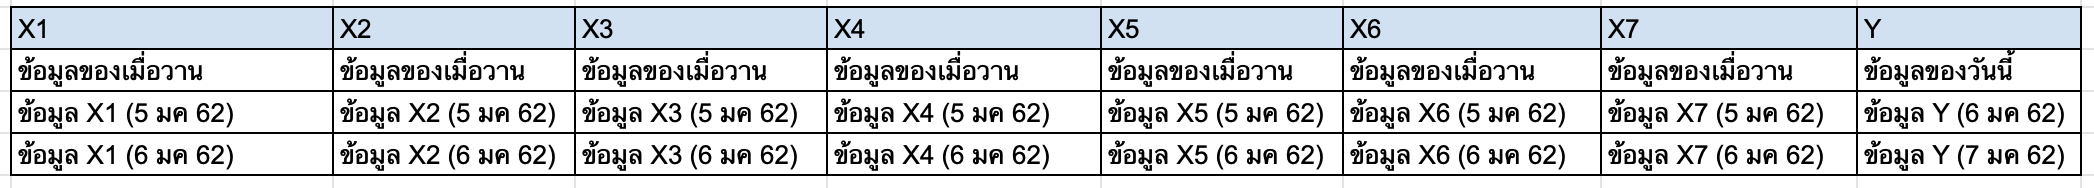



##ข้อมูลสภาพอากาศ

เรากลุ่ม 7 ทำนายความกด

In [408]:
import pandas as pd
weather = pd.read_csv('/content/drive/MyDrive/DPDM/Midterm/Group7_17ธนภรณ์_19นารากร_20สุริยา_35อรัญญา.csv')

In [466]:
features = weather[['อุณหภูมิตุ้มแห้ง','อุณหภูมิต่ำสุด','อุณหภูมิจุดน้ำค้าง','จำนวนเมฆ','ปริมาณฝน','ความชื้นสัมพัทธ์','ความเร็วลม','ความกด']]
features

,อุณหภูมิตุ้มแห้ง,อุณหภูมิต่ำสุด,อุณหภูมิจุดน้ำค้าง,จำนวนเมฆ,ปริมาณฝน,ความชื้นสัมพัทธ์,ความเร็วลม,ความกด
0,27.6,24.8,24.2,9,1.4,83,3,1005.47
1,25.6,23.0,24.0,10,17.7,92,2,1006.65
2,25.6,22.1,22.9,10,3,86,3,1007.49
3,25.8,22.8,21.9,8,0,80,2,1008.28
4,24.3,23.1,21.7,10,2.2,86,2,1009.88
...,...,...,...,...,...,...,...,...
8164,26.8,18.0,18.4,0,0,69,1,1008.39
8165,27.8,19.5,17.3,0,0,61,1,1006.05
8166,26.3,16.0,13.0,0,0,55,2,1004.86
8167,25.2,15.3,13.8,2,0,56,1,1005.76


In [431]:
data_features_d = features[features.eq('-').any(1)==False]
data_features_d.shape

(5208, 8)

In [432]:
data_features_d = data_features_d[data_features_d.eq('T').any(1)==False]
data_features_d.shape

(5061, 8)

In [434]:
data_features_d['ความเร็วลม'] = data_features_d['ความเร็วลม'].astype(float)
data_features_d['จำนวนเมฆ'] = data_features_d['จำนวนเมฆ'].astype(float)
data_features_d['ปริมาณฝน'] = data_features_d['ปริมาณฝน'].astype(float)
data_features_d['อุณหภูมิต่ำสุด'] = data_features_d['อุณหภูมิต่ำสุด'].astype(float)

In [435]:
data_features_d

,อุณหภูมิตุ้มแห้ง,อุณหภูมิต่ำสุด,อุณหภูมิจุดน้ำค้าง,จำนวนเมฆ,ปริมาณฝน,ความชื้นสัมพัทธ์,ความเร็วลม,ความกด
0,27.6,24.8,24.2,9.0,1.4,83,3.0,1005.47
1,25.6,23.0,24.0,10.0,17.7,92,2.0,1006.65
2,25.6,22.1,22.9,10.0,3.0,86,3.0,1007.49
3,25.8,22.8,21.9,8.0,0.0,80,2.0,1008.28
4,24.3,23.1,21.7,10.0,2.2,86,2.0,1009.88
...,...,...,...,...,...,...,...,...
8164,26.8,18.0,18.4,0.0,0.0,69,1.0,1008.39
8165,27.8,19.5,17.3,0.0,0.0,61,1.0,1006.05
8166,26.3,16.0,13.0,0.0,0.0,55,2.0,1004.86
8167,25.2,15.3,13.8,2.0,0.0,56,1.0,1005.76


In [436]:
X = data_features_d[['อุณหภูมิตุ้มแห้ง','อุณหภูมิต่ำสุด','อุณหภูมิจุดน้ำค้าง','จำนวนเมฆ','ปริมาณฝน','ความชื้นสัมพัทธ์','ความเร็วลม']]
Y = data_features_d[['ความกด']]

In [460]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm


x = data_features_d[['อุณหภูมิตุ้มแห้ง','อุณหภูมิต่ำสุด','อุณหภูมิจุดน้ำค้าง','จำนวนเมฆ','ปริมาณฝน','ความชื้นสัมพัทธ์','ความเร็วลม']]
y = data_features_d[['ความกด']]


# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(x) # adding a constant

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 [1037.35839232]
Coefficients: 
 [[-0.79119506  0.06167183 -0.02170347 -0.04608694 -0.04990126 -0.08324003
   0.18330833]]
                                 OLS Regression Results                                
Dep. Variable:                 ความกด   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          6.243e+05
Date:                Thu, 09 Feb 2023   Prob (F-statistic):                        0.00
Time:                        17:13:01   Log-Likelihood:                         -25090.
No. Observations:                5061   AIC:                                  5.019e+04
Df Residuals:                    5054   BIC:                                  5.024e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                    

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


##Linear Regression

In [463]:
from sklearn.linear_model import LinearRegression

x = data_features_d[['อุณหภูมิตุ้มแห้ง','อุณหภูมิต่ำสุด','อุณหภูมิจุดน้ำค้าง','จำนวนเมฆ','ปริมาณฝน','ความชื้นสัมพัทธ์','ความเร็วลม']]
y = data_features_d[['ความกด']]

#Define the multiple linear regression model
linear_regression = LinearRegression()

#Fit the multiple linear regression model
linear_regression.fit(x,y)

#predict with the data
y_pred = linear_regression.predict(x)

y_pred

array([[1009.68200452],
       [1009.36577996],
       [1010.75044617],
       ...,
       [1013.04298149],
       [1013.49404076],
       [1013.06995505]])

In [470]:
pred_y = pd.DataFrame(y_pred)

In [474]:
x

,อุณหภูมิตุ้มแห้ง,อุณหภูมิต่ำสุด,อุณหภูมิจุดน้ำค้าง,จำนวนเมฆ,ปริมาณฝน,ความชื้นสัมพัทธ์,ความเร็วลม
0,27.6,24.8,24.2,9.0,1.4,83,3.0
1,25.6,23.0,24.0,10.0,17.7,92,2.0
2,25.6,22.1,22.9,10.0,3.0,86,3.0
3,25.8,22.8,21.9,8.0,0.0,80,2.0
4,24.3,23.1,21.7,10.0,2.2,86,2.0
...,...,...,...,...,...,...,...
8164,26.8,18.0,18.4,0.0,0.0,69,1.0
8165,27.8,19.5,17.3,0.0,0.0,61,1.0
8166,26.3,16.0,13.0,0.0,0.0,55,2.0
8167,25.2,15.3,13.8,2.0,0.0,56,1.0


In [478]:
df1 = x.rename(columns={'อุณหภูมิตุ้มแห้ง':'X1','อุณหภูมิต่ำสุด':'X2','อุณหภูมิจุดน้ำค้าง':'X3','จำนวนเมฆ':'X4','ปริมาณฝน':'X5','ความชื้นสัมพัทธ์':'X6','ความเร็วลม':'X7'})

In [476]:
y

,ความกด
0,1005.47
1,1006.65
2,1007.49
3,1008.28
4,1009.88
...,...
8164,1008.39
8165,1006.05
8166,1004.86
8167,1005.76


In [486]:
df2 = pred_y.rename(columns={0:'Y'})

,index,Y
0,0,1009.682005
1,1,1009.365780
2,2,1010.750446
3,3,1011.215090
4,4,1011.723328
...,...,...
5056,5056,1011.304860
5057,5057,1011.295967
5058,5058,1013.042981
5059,5059,1013.494041


In [496]:
df1['อะไรก็ได้'] = range(0,5061)
df1

,X1,X2,X3,X4,X5,X6,X7,อะไรก็ได้
0,27.6,24.8,24.2,9.0,1.4,83,3.0,0
1,25.6,23.0,24.0,10.0,17.7,92,2.0,1
2,25.6,22.1,22.9,10.0,3.0,86,3.0,2
3,25.8,22.8,21.9,8.0,0.0,80,2.0,3
4,24.3,23.1,21.7,10.0,2.2,86,2.0,4
...,...,...,...,...,...,...,...,...
8164,26.8,18.0,18.4,0.0,0.0,69,1.0,5056
8165,27.8,19.5,17.3,0.0,0.0,61,1.0,5057
8166,26.3,16.0,13.0,0.0,0.0,55,2.0,5058
8167,25.2,15.3,13.8,2.0,0.0,56,1.0,5059


In [497]:
df2['อะไรวะ'] = range(0,5061)
df2

,Y,อะไรวะ
0,1009.682005,0
1,1009.365780,1
2,1010.750446,2
3,1011.215090,3
4,1011.723328,4
...,...,...
5056,1011.304860,5056
5057,1011.295967,5057
5058,1013.042981,5058
5059,1013.494041,5059


In [502]:
result = df1.merge(df2, left_on = 'อะไรก็ได้', right_on ='อะไรวะ')
results = result[['X1','X2','X3','X4','X5','X6','X7','Y']]
results

,X1,X2,X3,X4,X5,X6,X7,Y
0,27.6,24.8,24.2,9.0,1.4,83,3.0,1009.682005
1,25.6,23.0,24.0,10.0,17.7,92,2.0,1009.365780
2,25.6,22.1,22.9,10.0,3.0,86,3.0,1010.750446
3,25.8,22.8,21.9,8.0,0.0,80,2.0,1011.215090
4,24.3,23.1,21.7,10.0,2.2,86,2.0,1011.723328
...,...,...,...,...,...,...,...,...
5056,26.8,18.0,18.4,0.0,0.0,69,1.0,1011.304860
5057,27.8,19.5,17.3,0.0,0.0,61,1.0,1011.295967
5058,26.3,16.0,13.0,0.0,0.0,55,2.0,1013.042981
5059,25.2,15.3,13.8,2.0,0.0,56,1.0,1013.494041
